In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Download the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
Get the data ready for a format to combine the data. Get the data and maybe some lag information.

In [3]:
# CPI 
cpi = pd.read_csv(r'data/cpi.csv')
cpi.columns = ['date', 'cpi_base']
cpi['date'] = pd.to_datetime(cpi['date'], format='%Y-%m-%d')
cpi['1yr_change'] = cpi['cpi_base'].diff()
cpi['1yr_cpi_pct_change'] = cpi['cpi_base'].pct_change() * 100
cpi.head()

,date,cpi_base,1yr_change,1yr_cpi_pct_change
0,1960-01-01,1.457976,NaN,NaN
1,1961-01-01,1.070724,-0.387252,-26.560920
2,1962-01-01,1.198773,0.128049,11.959121
3,1963-01-01,1.239669,0.040896,3.411493
4,1964-01-01,1.278912,0.039242,3.165533


In [4]:
fed_funds_rate = pd.read_csv(r'data/fed_funds_rate.csv')
fed_funds_rate.columns = ["date", "base_fed_funds_rate"]
fed_funds_rate['date'] = pd.to_datetime(fed_funds_rate['date'], format='%Y-%m-%d')
fed_funds_rate['1day_fed_funds_change'] = fed_funds_rate['base_fed_funds_rate'].diff()
fed_funds_rate['1yr_fed_funds_diff'] = fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(365) 
fed_funds_rate['1yr_fed_funds_pct_change'] = (fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(365))/fed_funds_rate['base_fed_funds_rate'].shift(365)
fed_funds_rate['1m_fed_funds_diff'] = fed_funds_rate['base_fed_funds_rate'] - fed_funds_rate['base_fed_funds_rate'].shift(30) 
fed_funds_rate

,date,base_fed_funds_rate,1day_fed_funds_change,1yr_fed_funds_diff,1yr_fed_funds_pct_change,1m_fed_funds_diff
0,2019-06-06,2.37,NaN,NaN,NaN,NaN
1,2019-06-07,2.37,0.0,NaN,NaN,NaN
2,2019-06-08,2.37,0.0,NaN,NaN,NaN
3,2019-06-09,2.37,0.0,NaN,NaN,NaN
4,2019-06-10,2.37,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1823,2024-06-02,5.33,0.0,0.25,0.049213,0.0
1824,2024-06-03,5.33,0.0,0.25,0.049213,0.0
1825,2024-06-04,5.33,0.0,0.25,0.049213,0.0
1826,2024-06-05,5.33,0.0,0.25,0.049213,0.0


In [5]:
gdp = pd.read_csv(r'data/gdp.csv')
gdp.columns = ["date", 'gdp_base']
gdp['date'] = pd.to_datetime(gdp['date'], format='%Y-%m-%d')
gdp = gdp[gdp['date'].dt.month == 1] # Came in by quarter, easiest thing to do was just take the first day of the year 
gdp['1yr_gdp_pct_change'] = gdp['gdp_base'].pct_change() * 100
gdp

,date,gdp_base,1yr_gdp_pct_change
0,1947-01-01,2182.681,NaN
4,1948-01-01,2239.682,2.611513
8,1949-01-01,2260.807,0.943214
12,1950-01-01,2346.104,3.772856
16,1951-01-01,2593.967,10.564877
...,...,...,...
292,2020-01-01,20665.553,1.226555
296,2021-01-01,20990.541,1.572607
300,2022-01-01,21738.871,3.565082
304,2023-01-01,22112.329,1.717927


In [6]:
sentiment = pd.read_csv(r'data/sentiment.csv')
sentiment.columns = ['date', 'base_sentiment']
sentiment = sentiment[sentiment['base_sentiment'] != '.']
sentiment['base_sentiment'] = sentiment['base_sentiment'].astype(float)

# There were a few months that were spread out and not one of them was the first of the year. I have taken the yearly average and placed that as the first of the year
sentiment['date'] = pd.to_datetime(sentiment['date'], format='%Y-%m-%d')
sentiment['year'] = sentiment['date'].dt.year
yearly_avg_sentiment = sentiment.groupby('year')['base_sentiment'].mean().reset_index()
yearly_avg_sentiment['date'] = pd.to_datetime(yearly_avg_sentiment['year'].astype(str) + '-01-01')
sentiment = yearly_avg_sentiment[['date', 'base_sentiment']]


sentiment['1yr_sentiment_pct_change'] = sentiment['base_sentiment'].pct_change() * 100

sentiment.head()

,date,base_sentiment,1yr_sentiment_pct_change
0,1952-01-01,86.200000,NaN
1,1953-01-01,84.066667,-2.474865
2,1954-01-01,83.966667,-0.118953
3,1955-01-01,98.233333,16.990869
4,1956-01-01,99.433333,1.221581


In [7]:
u_rate = pd.read_csv(r'data/u_rate.csv')
u_rate.columns = ['date', 'base_u_rate']
u_rate['date'] = pd.to_datetime(u_rate['date'], format='%Y-%m-%d')
u_rate['1m_u_rate_pct_change'] = u_rate['base_u_rate'].pct_change() * 100
u_rate['1yr_u_rate_pct_diff'] = u_rate['base_u_rate'].pct_change(periods=12) * 100

u_rate.head()

,date,base_u_rate,1m_u_rate_pct_change,1yr_u_rate_pct_diff
0,1948-01-01,3.4,NaN,NaN
1,1948-02-01,3.8,11.764706,NaN
2,1948-03-01,4.0,5.263158,NaN
3,1948-04-01,3.9,-2.500000,NaN
4,1948-05-01,3.5,-10.256410,NaN


# S&P 500 processing 
As this is the heart of our data and it is daily. For further analysis also I would want the data processed slightly differently. 

In [8]:
sp_price_action = pd.read_csv(r'data/SP_price_action.csv')
sp_price_action = sp_price_action[['Date', 'Adj Close', 'Volume']]
sp_price_action.columns = ['date', 'price', 'volume']
sp_price_action['date'] = pd.to_datetime(sp_price_action['date'])
sp_price_action = sp_price_action[~sp_price_action['price'].isna()]
sp_price_action = sp_price_action[sp_price_action['volume'] > 0]
sp_price_action.head()

,date,price,volume
5496,1950-01-03,16.66,1260000.0
5497,1950-01-04,16.85,1890000.0
5498,1950-01-05,16.93,2550000.0
5499,1950-01-06,16.98,2010000.0
5500,1950-01-09,17.08,2520000.0


## Adding columns to the data

In [9]:
#Columns to add
# Set 'date' as index
sp_price_action.set_index('date', inplace=True)

# Calculate 1-Day Price Difference
sp_price_action['price_1d_diff'] = sp_price_action['price'].diff()

# Calculate 1-Month Price Difference
sp_price_action['price_1m_diff'] = sp_price_action['price'] - sp_price_action['price'].shift(21)  # Approx. 21 trading days in a month

# Calculate 1-Day Volume Difference
sp_price_action['volume_1d_diff'] = sp_price_action['volume'].diff()

# Calculate 1-Month Volume Difference
sp_price_action['volume_1m_diff'] = sp_price_action['volume'] - sp_price_action['volume'].shift(21)  # Approx. 21 trading days in a month

# Calculate Percentage Change in Price
sp_price_action['price_pct_change'] = sp_price_action['price'].pct_change() * 100

# Calculate Rolling Mean Price (7-day)
sp_price_action['rolling_mean_price_7d'] = sp_price_action['price'].rolling(window=7).mean()

# Calculate Rolling Standard Deviation Price (7-day)
sp_price_action['rolling_std_price_7d'] = sp_price_action['price'].rolling(window=7).std()

# Calculate Rolling Mean Volume (7-day)
sp_price_action['rolling_mean_volume_7d'] = sp_price_action['volume'].rolling(window=7).mean()

# Calculate Rolling Standard Deviation Volume (7-day)
sp_price_action['rolling_std_volume_7d'] = sp_price_action['volume'].rolling(window=7).std()

# Calculate Price Momentum (14-day)
sp_price_action['momentum_14d'] = sp_price_action['price'] - sp_price_action['price'].shift(14)

# Calculate Exponential Moving Average (20-day)
sp_price_action['ema_20d'] = sp_price_action['price'].ewm(span=20, adjust=False).mean()

# Calculate Year-over-Year Price Change
sp_price_action['price_yoy_diff'] = sp_price_action['price'] - sp_price_action['price'].shift(365)

# Calculate Year-over-Year Volume Change
sp_price_action['volume_yoy_diff'] = sp_price_action['volume'] - sp_price_action['volume'].shift(365)

# Calculate Year-over-Year Percentage Price Change
sp_price_action['price_yoy_pct_change'] = sp_price_action['price'].pct_change(periods=365) * 100

# Calculate Year-over-Year Percentage Volume Change
sp_price_action['volume_yoy_pct_change'] = sp_price_action['volume'].pct_change(periods=365) * 100

sp_price_action = sp_price_action.reset_index()

# Building Modeling Datasets

# 1 Year Dataset
With so many varying time frames, the one that appears the most common is the 1 year timeframe. I will build a dataset to model that one off of. 

In [10]:
# Get all of the year related columns in the dataset
year_sp_price_action = sp_price_action[['date', 'price_yoy_diff', 'volume_yoy_diff', 'price_yoy_pct_change', 'volume_yoy_pct_change']]
year_u_rate = u_rate[['date', '1yr_u_rate_pct_diff']]
year_sentiment = sentiment[['date', '1yr_sentiment_pct_change']]
year_gdp = gdp[['date', '1yr_gdp_pct_change']]
year_fed_funds_rate = fed_funds_rate[['date', '1yr_fed_funds_pct_change']]
year_cpi = cpi[['date', '1yr_cpi_pct_change']]

In [11]:
# Group them all together into one dataset
year_df1 = pd.merge(year_sp_price_action, year_u_rate, on='date', how='outer')
year_df2 = pd.merge(year_df1, year_sentiment, on='date', how='outer')
year_df3 = pd.merge(year_df2, year_gdp, on='date', how='outer')
year_df4 = pd.merge(year_df3, year_fed_funds_rate, on='date', how='outer')
year_df5 = pd.merge(year_df4, year_cpi, on='date', how='outer')
year_df5

,date,price_yoy_diff,volume_yoy_diff,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change
0,1950-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19621,2024-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19622,2024-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19623,2024-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN
19624,2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049213,NaN


The year data requires some extra work because the data is released at different times. I started by taking just the first of the year but that ended up not working because the stock market is not open on Jan 1, when lots of the year data is postmarked. So in order to also further clean the data, I took an average of the entire year, ignoting all the NaN. This way I have a dataset to work on

In [12]:
year_df5['year'] = year_df5['date'].dt.year
final_year_averages = year_df5.groupby('year').mean(numeric_only=True)
final_year_averages = final_year_averages[~final_year_averages['price_yoy_diff'].isna()]
final_year_averages

,price_yoy_diff,volume_yoy_diff,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change
year,,,,,,,,,
1951,5.123985,-3.953383e+05,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN
1952,3.988280,-6.749200e+05,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN
1953,1.140359,1.243028e+04,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN
1954,4.608373,8.485317e+05,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN
1955,14.468690,9.003571e+05,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020,416.037672,1.306877e+09,14.889219,38.676798,121.924519,-15.046015,1.226555,-0.953299,-31.929283
2021,1254.378536,-1.543642e+08,42.304832,8.150914,-17.346642,-4.813490,1.572607,-0.196831,280.829952
2022,304.605501,3.890279e+07,9.473566,5.095595,-30.502669,-24.017608,3.565082,20.089552,70.349941


## Adding the dependent variable
buy - if the next years price_yoy_pct_change is over 10  
hold - if the next years price_yoy_pct_change is 5-10  
sell - if the next years price_yoy_pct_change is under 5  

In [13]:
# Calculate the price_yoy_pct_change for the next year
final_year_averages['next_year_price_yoy_pct_change'] = final_year_averages['price_yoy_pct_change'].shift(-1)

def determine_action(change):
    if pd.isna(change):
        return None
    elif change > 10:
        return 'buy'
    elif 5 <= change <= 10:
        return 'hold'
    else:
        return 'sell'

final_year_averages['action'] = final_year_averages['next_year_price_yoy_pct_change'].apply(determine_action)
final_year_averages.drop(columns=['next_year_price_yoy_pct_change'], inplace=True)

final_year_averages.columns

Index(['price_yoy_diff', 'volume_yoy_diff', 'price_yoy_pct_change',
       'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
       '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       '1yr_fed_funds_pct_change', '1yr_cpi_pct_change', 'action'],
      dtype='object')

remove the non percent changes because those can get negatively effected 

In [14]:
final_year_modeling_data = final_year_averages[['price_yoy_pct_change',
       'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
       '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       '1yr_fed_funds_pct_change', '1yr_cpi_pct_change', 'action']]
final_year_modeling_data = final_year_modeling_data.reset_index()
final_year_modeling_data

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change,action
0,1951,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN,buy
1,1952,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN,sell
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN,buy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN,buy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN,buy
...,...,...,...,...,...,...,...,...,...
69,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,-0.953299,-31.929283,buy
70,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,-0.196831,280.829952,hold
71,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,20.089552,70.349941,sell
72,2023,-1.571161,-6.833823,-0.016389,10.809665,1.717927,14.323897,NaN,buy


# Unsupervised Learning 

## With Economic Indicators

There were a lot of nulls so I dropped a column and removed rows with Nan. I 

In [15]:
final_year_modeling_data.isna().sum()

year                         0
price_yoy_pct_change         0
volume_yoy_pct_change        0
1yr_u_rate_pct_diff          0
1yr_sentiment_pct_change     2
1yr_gdp_pct_change           0
1yr_fed_funds_pct_change    69
1yr_cpi_pct_change          12
action                       1
dtype: int64

In [16]:
unsupervised_economic_data_for_modeling = final_year_modeling_data[['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'action']]
unsupervised_economic_data_for_modeling = unsupervised_economic_data_for_modeling.dropna()
unsupervised_economic_data_for_modeling.columns

Index(['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       'action'],
      dtype='object')

In [17]:
# Preprocess the data by scaling
features = ['price_yoy_pct_change', '1yr_u_rate_pct_diff','1yr_sentiment_pct_change', '1yr_gdp_pct_change']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(unsupervised_economic_data_for_modeling[features])

I am now going to build out the model. I will be experimenting with different cluster sizes but the goal here is to see if we can find clusters that breakdown "bad", "average" and "good" economy. 

In [18]:
kmeans_model = KMeans(n_clusters=3, random_state=5) 
unsupervised_economic_data_for_modeling['cluster'] = kmeans_model.fit_predict(scaled_features)

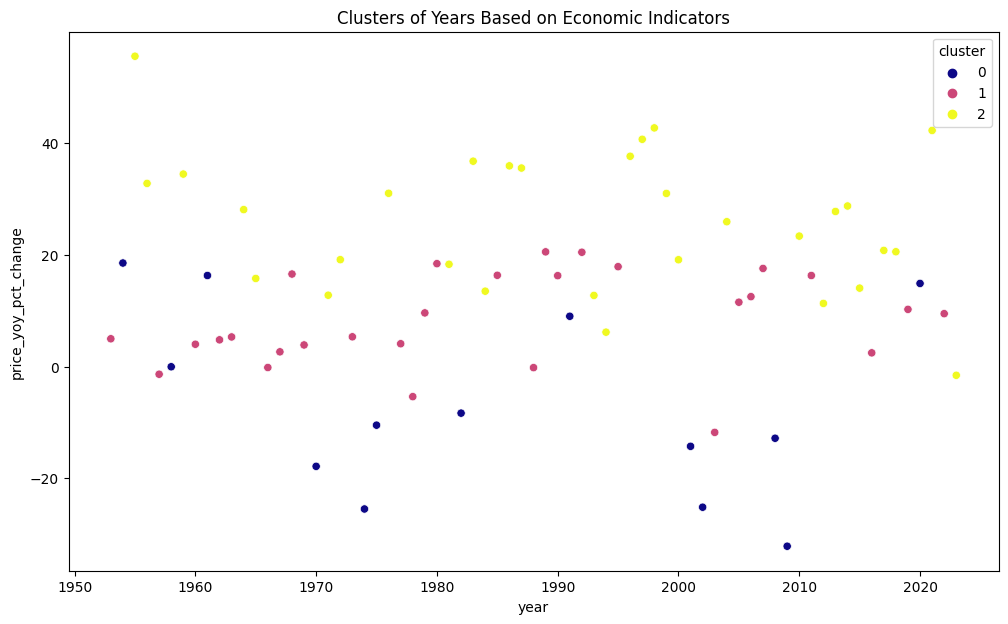

In [19]:
# Visualize the clusters
# Where I got Hue info: https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
# Where I got plotting info: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(12, 7)) 
sns.scatterplot(x='year', 
                y='price_yoy_pct_change', 
                hue='cluster', 
                data=unsupervised_economic_data_for_modeling, 
                palette='plasma')
plt.title('Clusters of Years Based on Economic Indicators')
plt.show()

From the visual above we can see that the clusters identified what look to be three sort of moods of the economy. Cluster 0 looks to be a pretty bad economy. Cluster 1 looks the be avergae good economy. And cluster 2 appears to be a good economy. These are all mapped against the S&P 500 price change over time. I want to confirm this by looking at the means of each row. And it will be good to visualize this. I also removed volume (I would like to see if that is a very helpful column)

In [20]:
# Calculate mean values of features for each cluster
cluster_means = unsupervised_economic_data_for_modeling[features + ['cluster']].groupby('cluster').mean()
cluster_means

,price_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change
cluster,,,,
0,-6.779192,45.600103,-6.957453,-0.529298
1,8.295616,-4.479082,-4.658681,3.920817
2,25.783857,-7.769232,7.603798,3.720159


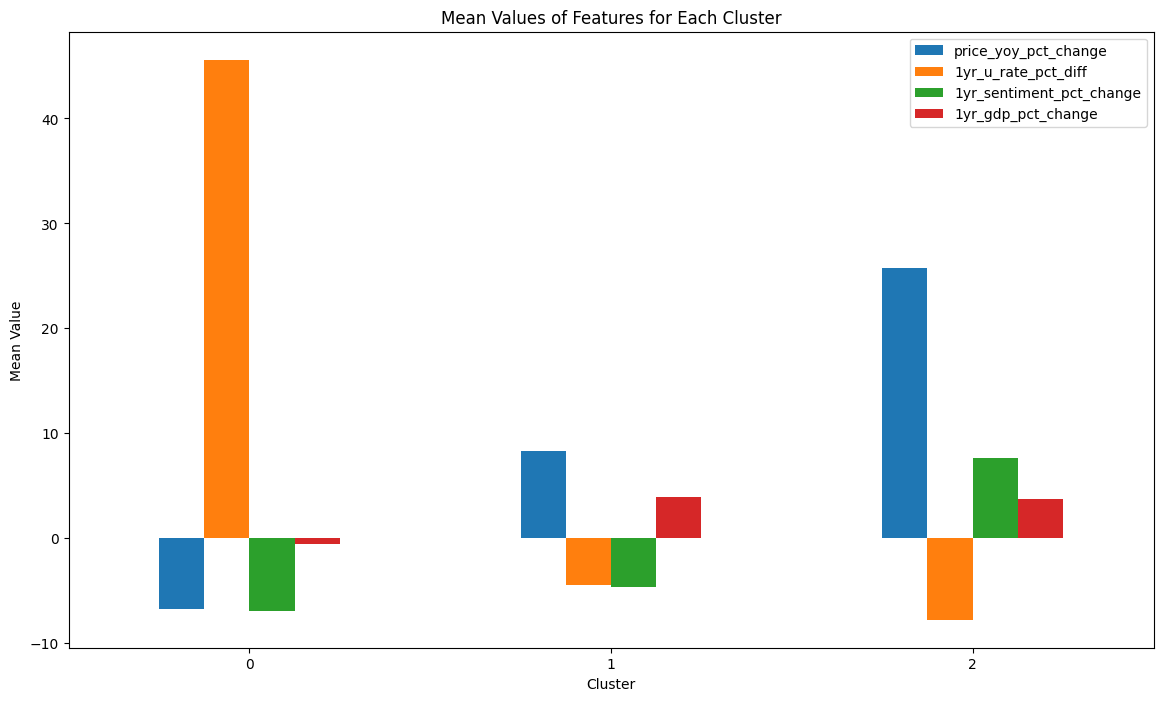

In [21]:
# Plotting
cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()

I now want to rename the columns so they match the findings 

In [22]:
# Define the new labels based on your observations
cluster_labels = {
    0: 'Bad Economy',  
    1: 'Average Economy', 
    2: 'Good Economy'  
}

# Apply the new labels to the 'cluster' column
unsupervised_economic_data_for_modeling['economy_label'] = unsupervised_economic_data_for_modeling['cluster'].map(cluster_labels)
unsupervised_economic_data_for_modeling

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,action,cluster,economy_label
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,buy,1,Average Economy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,buy,0,Bad Economy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,buy,2,Good Economy
5,1956,32.815013,-13.784416,-5.064776,1.221581,3.216954,sell,2,Good Economy
6,1957,-1.380315,1.127496,4.334827,-11.196782,3.049756,sell,1,Average Economy
...,...,...,...,...,...,...,...,...,...
68,2019,10.242900,5.918325,-5.549916,-2.422907,1.851285,buy,1,Average Economy
69,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,buy,0,Bad Economy
70,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,hold,2,Good Economy
71,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,sell,1,Average Economy


In [23]:
labeled_means = unsupervised_economic_data_for_modeling[['price_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change','economy_label']].groupby('economy_label').mean()
labeled_means

,price_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change
economy_label,,,,
Average Economy,8.295616,-4.479082,-4.658681,3.920817
Bad Economy,-6.779192,45.600103,-6.957453,-0.529298
Good Economy,25.783857,-7.769232,7.603798,3.720159


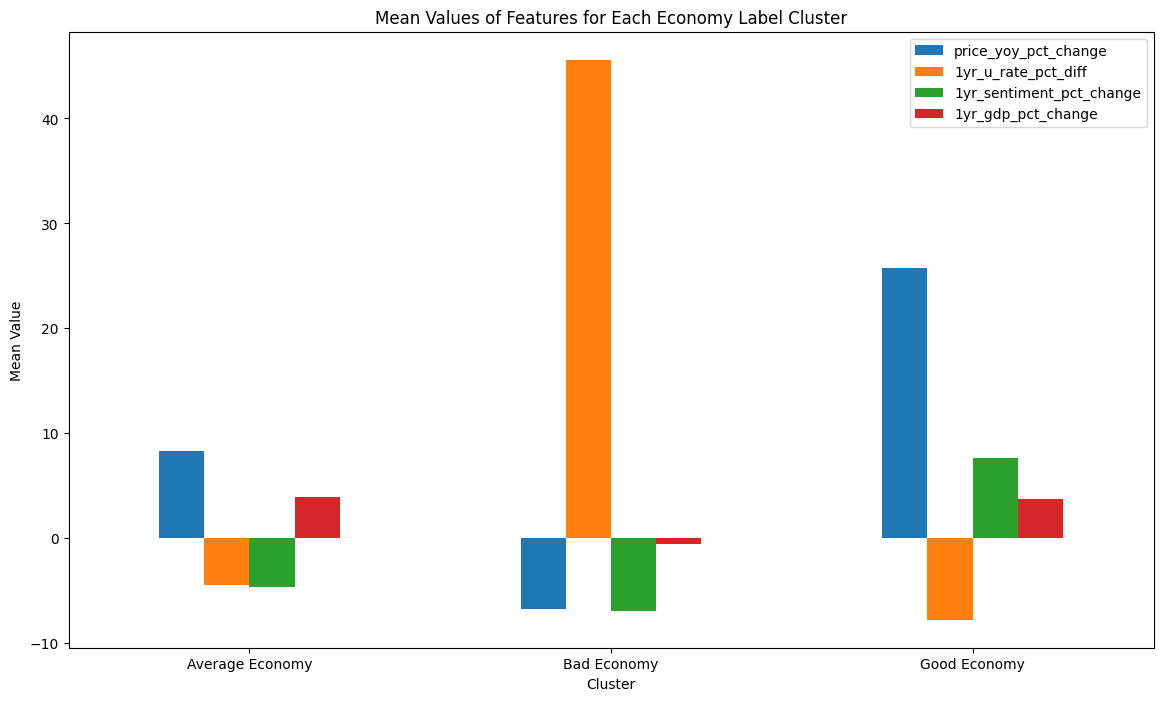

In [24]:
# Plotting
labeled_means.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Values of Features for Each Economy Label Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()

Now we have a dataset with the economy label built in. I would like a lot of different visuals with this. Such as are we buying more on one economy or another or some of the data compare to the economy, just would like some cool visuals with this. 

In [25]:
economic_data_with_economy_label = unsupervised_economic_data_for_modeling[['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change','economy_label',
       'action']]
economic_data_with_economy_label = economic_data_with_economy_label.reset_index(drop=True)
economic_data_with_economy_label

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,economy_label,action
0,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,Average Economy,buy
1,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,Bad Economy,buy
2,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,Good Economy,buy
3,1956,32.815013,-13.784416,-5.064776,1.221581,3.216954,Good Economy,sell
4,1957,-1.380315,1.127496,4.334827,-11.196782,3.049756,Average Economy,sell
...,...,...,...,...,...,...,...,...
66,2019,10.242900,5.918325,-5.549916,-2.422907,1.851285,Average Economy,buy
67,2020,14.889219,38.676798,121.924519,-15.046015,1.226555,Bad Economy,buy
68,2021,42.304832,8.150914,-17.346642,-4.813490,1.572607,Good Economy,hold
69,2022,9.473566,5.095595,-30.502669,-24.017608,3.565082,Average Economy,sell


In [26]:
economic_data_with_economy_label.columns

Index(['year', 'price_yoy_pct_change', 'volume_yoy_pct_change',
       '1yr_u_rate_pct_diff', '1yr_sentiment_pct_change', '1yr_gdp_pct_change',
       'economy_label', 'action'],
      dtype='object')

# Supervised Learning Portion

## Prep The Data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = economic_data_with_economy_label.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
data['economy_label_encoded'] = label_encoder.fit_transform(data['economy_label'])
data['action_encoded'] = label_encoder.fit_transform(data['action'])

# Features and target variable
features = ['price_yoy_pct_change', 'volume_yoy_pct_change', '1yr_u_rate_pct_diff',
            '1yr_sentiment_pct_change', '1yr_gdp_pct_change', 'economy_label_encoded']
target = 'action_encoded'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

### Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f'Logistic Regression Accuracy: {log_reg_scores.mean():.2f} (+/- {log_reg_scores.std() * 2:.2f})')

# Train the model
log_reg.fit(X_train_scaled, y_train)


Logistic Regression Accuracy: 0.61 (+/- 0.18)


LogisticRegression(random_state=42)

### Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         4

    accuracy                           0.67        15
   macro avg       0.41      0.43      0.42        15
weighted avg       0.62      0.67      0.64        15



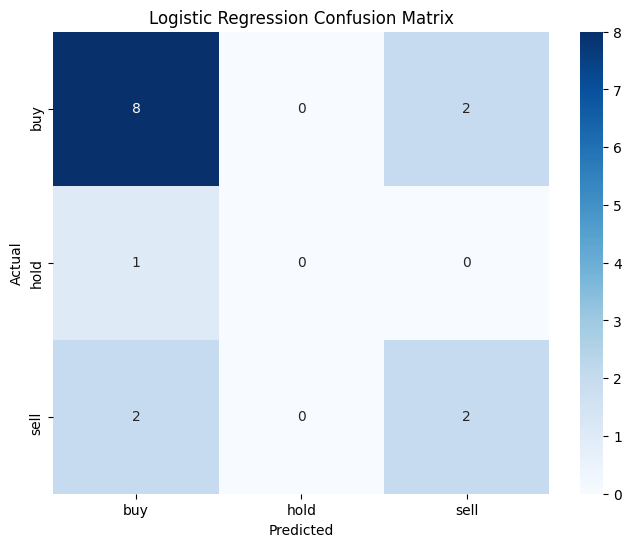

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Feature Coefficients

                    Feature  Coefficient  Absolute Coefficient
2       1yr_u_rate_pct_diff     0.646561              0.646561
3  1yr_sentiment_pct_change     0.489938              0.489938
5     economy_label_encoded    -0.405590              0.405590
1     volume_yoy_pct_change    -0.263787              0.263787
0      price_yoy_pct_change     0.249030              0.249030
4        1yr_gdp_pct_change    -0.081007              0.081007


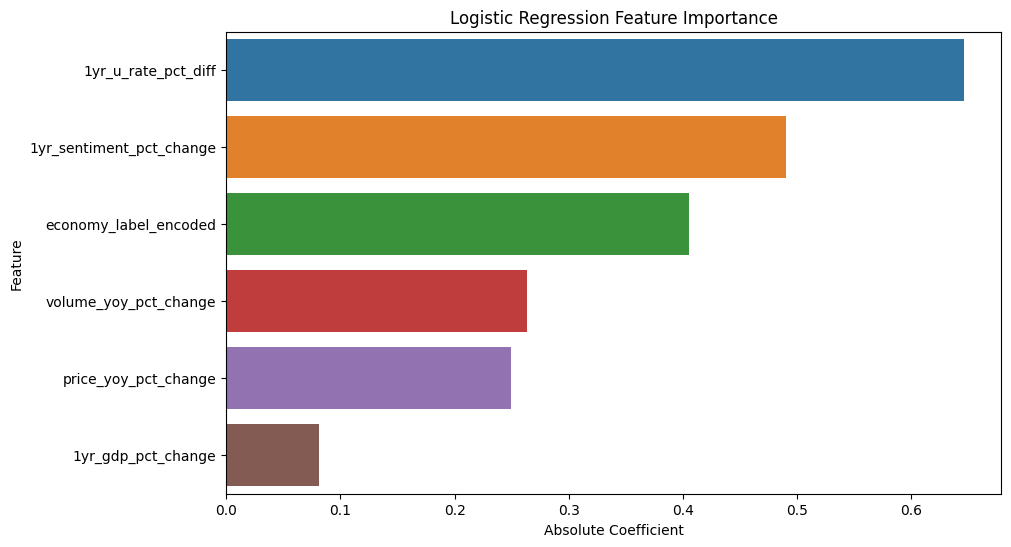

In [30]:
import numpy as np

# Feature importance for Logistic Regression
log_reg_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})

log_reg_coef['Absolute Coefficient'] = np.abs(log_reg_coef['Coefficient'])
log_reg_coef = log_reg_coef.sort_values(by='Absolute Coefficient', ascending=False)
print(log_reg_coef)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=log_reg_coef)
plt.title('Logistic Regression Feature Importance')
plt.show()


### What the model says you should be doing this year

In [31]:
# TODO 

## Decision Tree

### Model Building

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Cross-validation
tree_scores = cross_val_score(tree, X_train_scaled, y_train, cv=5)
print(f'Decision Tree Accuracy: {tree_scores.mean():.2f} (+/- {tree_scores.std() * 2:.2f})')

# Train the model
tree.fit(X_train_scaled, y_train)


Decision Tree Accuracy: 0.39 (+/- 0.20)


DecisionTreeClassifier(random_state=42)

### Evaluation

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.00      0.00      0.00         1
           2       0.14      0.25      0.18         4

    accuracy                           0.40        15
   macro avg       0.26      0.25      0.25        15
weighted avg       0.45      0.40      0.42        15



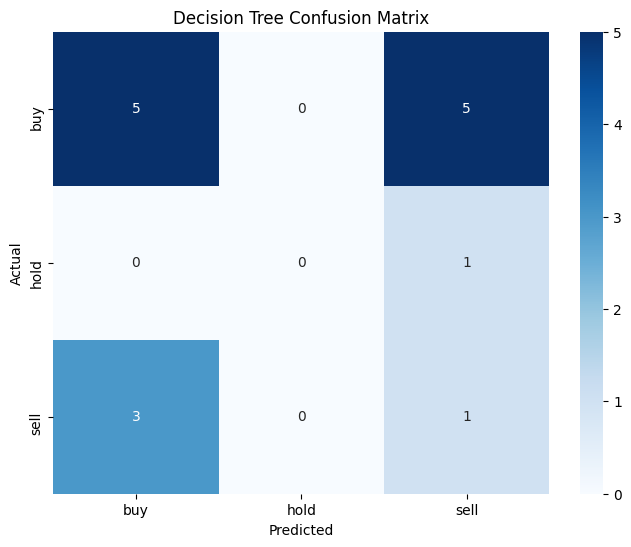

In [33]:
# Predict
y_pred_tree = tree.predict(X_test_scaled)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Feature Importance

                    Feature  Importance
2       1yr_u_rate_pct_diff    0.380792
4        1yr_gdp_pct_change    0.271553
0      price_yoy_pct_change    0.166200
3  1yr_sentiment_pct_change    0.147841
1     volume_yoy_pct_change    0.033613
5     economy_label_encoded    0.000000


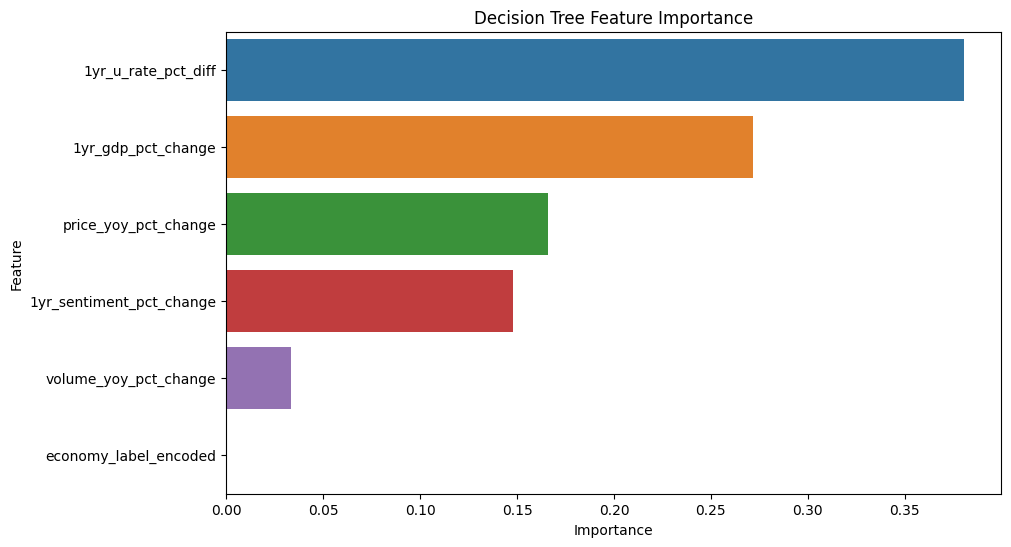

In [34]:
# Feature importance for Decision Tree
tree_importance = pd.DataFrame({
    'Feature': features,
    'Importance': tree.feature_importances_
})

tree_importance = tree_importance.sort_values(by='Importance', ascending=False)
print(tree_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importance)
plt.title('Decision Tree Feature Importance')
plt.show()


## Random Forest

### Model Building

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
forest = RandomForestClassifier(random_state=42)

# Cross-validation
forest_scores = cross_val_score(forest, X_train_scaled, y_train, cv=5)
print(f'Random Forest Accuracy: {forest_scores.mean():.2f} (+/- {forest_scores.std() * 2:.2f})')

# Train the model
forest.fit(X_train_scaled, y_train)


Random Forest Accuracy: 0.57 (+/- 0.14)


RandomForestClassifier(random_state=42)

### Evaluation

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.00      0.00      0.00         1
           2       0.33      0.25      0.29         4

    accuracy                           0.67        15
   macro avg       0.36      0.38      0.37        15
weighted avg       0.59      0.67      0.62        15



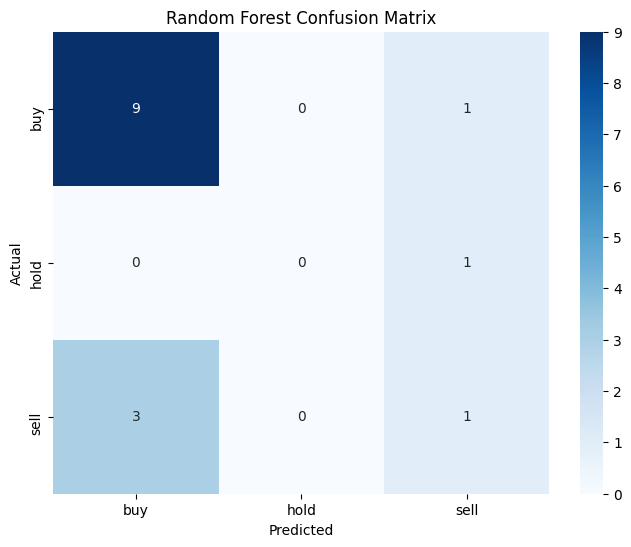

In [36]:
# Predict
y_pred_forest = forest.predict(X_test_scaled)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

# Confusion Matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Feature Importance

                    Feature  Importance
2       1yr_u_rate_pct_diff    0.225794
3  1yr_sentiment_pct_change    0.220501
0      price_yoy_pct_change    0.185924
1     volume_yoy_pct_change    0.177819
4        1yr_gdp_pct_change    0.166871
5     economy_label_encoded    0.023091


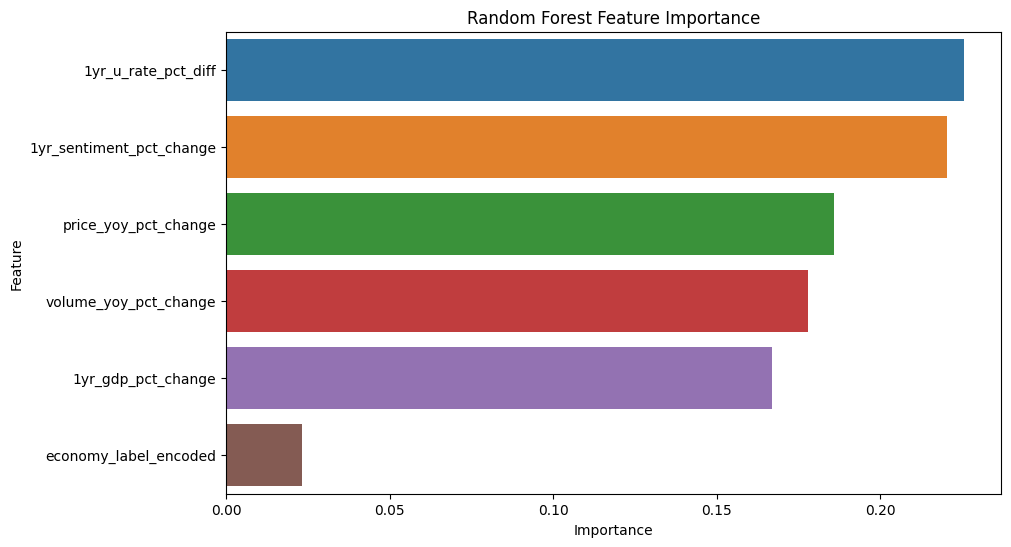

In [37]:
# Feature importance for Random Forest
forest_importance = pd.DataFrame({
    'Feature': features,
    'Importance': forest.feature_importances_
})

forest_importance = forest_importance.sort_values(by='Importance', ascending=False)
print(forest_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=forest_importance)
plt.title('Random Forest Feature Importance')
plt.show()


# If you ran to the year 2000
Going to use the logistic regression model as that seemed to have worked best. (Not sure if I will add this into the report or not)

In [38]:
X_train = data[data['year'] < 2000][features]
y_train = data[data['year'] < 2000][target]

X_test = data[data['year'] >= 2000][features]
y_test = data[data['year'] >= 2000][target]

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f'Logistic Regression Accuracy: {log_reg_scores.mean():.2f} (+/- {log_reg_scores.std() * 2:.2f})')

# Train the model
log_reg.fit(X_train_scaled, y_train)

Logistic Regression Accuracy: 0.55 (+/- 0.11)


LogisticRegression(random_state=42)

In [41]:
# Predict
y_pred_log_reg = log_reg.predict(X_test_scaled)
list(y_pred_log_reg)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2]

In [42]:
for index, label in enumerate(label_encoder.classes_):
    print(index, label)

0 buy
1 hold
2 sell
